<a href="https://colab.research.google.com/github/RFajardoMonzon/MachineLearningCourse/blob/master/Time_Series_Analysis_An%C3%A1lisis_de_Series_Temporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 17 - Análisis de Series Temporales.


*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## 1.  Evolución del consumo de potencia eléctrica.

Hoy trabajaremos con el tipo de datos que nos falta por analizar: Series temporales. Como ya vimos, el esquema de trabajo será similar al que utilizamos cuando trabajamos con texto, lo que en este caso en vez de secuencias de palabras, analizaremos secuencias de la misma variable y su evolución en el tiempo.

Hoy trabajaremos con el dataset ***Individual Household Electric Power Consumption***, que nos muestra la evolución durante 4 años de diferentes variables de consumo eléctrico, a un nivel de granularidad de ***minutos***. Recomiendo leer la información sobre las variables y el dataset en la descripción de su página web. *¿Contiene el dataset missing values?*

- **Documentación del dataset :** http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

> > > > > > <img src=https://storage.googleapis.com/kaggle-datasets-images/122/260/46fddab9a36e911c711f85624ac0081f/dataset-cover.jpeg width=500px>


---

**Tarea:** El trabajo de hoy consistirá en lo siguiente:


1. Carga el archivo y combina las columnas ***Date*** y ***Time*** en una única columna. La manera más eficiente de conseguir esto es utilizando los parámetros '*infer_datetime_format*' y '*parse_dates*'  contenidos en la función ***pd.read_csv()***. Cuando hayas creado la columna, establécela como el índice de la tabla de datos, que deberá de aparecer con un tipo de dato *DateTimeIndex* al llamar a la función ***data.info()***.

2. Comprueba si tu dataset contiene datos no asignados ('*NaN values*'). Te adelanto que en este caso los valores no nulos vienen en forma de 'nan' y '?'. ***¡Dehazte de ellos!***
3.Comprueba qué tipo de dato tiene cada una de tus columnas con '*dtype*'. Todas deberían de ser de tipo ***float64***, es decir, números en decimales. Sin embargo, los valores no nulos puede que nos hayan estropeado esto, y que todas estén como 'objects'. ***¡Soluciónalo!***.
4. Realiza un análisis exploratorio para entender con qué dataset estamos trabajando:
* **¿Es la escala de las variables semejante?** Visualízalo y actua en consecuencia.
* **¿Están las variables correlacionadas?** Visualízalo y actúa en consecuencia.
* **¿Grafica las series temporales de Global_active_power?** Lo positivo de haber modificado el índice como *DateTimeIndex* es que podemos utilizar la función *data.resample('M').mean()* para obtener por ejemplo el mismo dataset aglomerado por meses. Genera gráficas anuales, mensuales y diarías e  interprétalas. 

    **OJO!** Hacer un resample de los datos nos puede dejar nuevamente con *NaN values* de aquellos periodos en los que se divida por 0. *Soluciónalo.* ¿Crees que tras hacer una resamples de los datos, las anteriores visualizaciones se mantienen invariables? ¿Por qué?

5. **Preprocesa las variables y obten el dataset que vamos a analizar, agregado por días**. El tamaño del dataset obtenido debería de ser *(34589, 7)*. Con este dataset ahora probaremos a entrenar diferentes tipos de modelos, todos ellos utilizando redes LSTM. Para evaluar los modelos, haz una partición del número de datos del 75/25 entre **train** y **test.** Igualmente, cuando tengas a tu modelo entrenado, realiza una visualización de los resultados reales y los predichos. ¿Cómo ves el ajuste? ¿Estás seguro de que es correcto? Interprétalo para cada caso:

  1.   Entrena un modelo que prediga el valor de la variable *Global_Active_Power* en el tiempo **t** basado en los valores de la variable *Global_Active_Power* en el tiempo **t-1**. 
  2.   Entrena un modelo que prediga el valor de la variable *Global_Active_Power* en el tiempo **t** basado en los valores del resto de variables en el tiempo **t-1**.
 3.   Entrena un modelo que prediga el valor de la variable *Global_Active_Power* para los periodos comprendidos entre **t** y **t+7** (7 días),   basado en los valores de la variable *Global_Active_Power* en el tiempo **t-1**.
  4.   Entrena un modelo que prediga el valor de la variable *Global_Active_Power* para los periodos comprendidos entre **t** y **t+7** (7 días),  basado en los valores del resto de variables en el periodo compredido entre **t-1** y **t-4** (3 días).


In [0]:
!wget -N http://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip household_power_consumption.zip

--2019-06-04 15:13:49--  http://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20640916 (20M) [application/x-httpd-php]
Saving to: ‘household_power_consumption.zip’

household_power_con 100%[===================>]  19.68M  10.4MB/s    in 1.9s    

2019-06-04 15:13:51 (10.4 MB/s) - ‘household_power_consumption.zip’ saved [20640916/20640916]

Archive:  household_power_consumption.zip
  inflating: household_power_consumption.txt  


In [0]:
import pandas as pd

# COMIENZA AQUÍ TU CÓDIGO #

data = pd.read_csv("household_power_consumption.txt", header=0, delimiter=";",
                   parse_dates={"DateTime" : [0, 1]}, index_col=0, na_values="?",
                   infer_datetime_format=True)

In [0]:
bad_data = pd.read_csv("household_power_consumption.txt", header=0, delimiter=";",
                   parse_dates={"DateTime" : [0, 1]}, index_col=0,
                   infer_datetime_format=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
print(data.shape, bad_data.shape)

(2075259, 7) (2075259, 7)


In [0]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB
None


In [0]:
import numpy as np

mod_data = data.astype("float64")

dropped_data = mod_data.dropna()

print(dropped_data.shape)

float_values = dropped_data.values

boolean = false
if sadf in list:
  if boolean:
    return repe
  else:
    boolean=true

for i in np.arange(7):
  print("La media de la columna {} es: {}".format(i+1, np.mean(float_values[:, i])))
  print("La desviación típica de la columna {} es: {}".format(i+1, np.std(float_values[:, i])))

(2049280, 7)
La media de la columna 1 es: 1.0916150365006243
La desviación típica de la columna 1 es: 1.0572939031267237
La media de la columna 2 es: 0.12371447630387251
La desviación típica de la columna 2 es: 0.11272195204788764
La media de la columna 3 es: 240.83985797450816
La desviación típica de la columna 3 es: 3.239985888491173
La media de la columna 4 es: 4.627759310587131
La desviación típica de la columna 4 es: 4.444395175406089
La media de la columna 5 es: 1.1219233096502186
La desviación típica de la columna 5 es: 6.1530295884346
La media de la columna 6 es: 1.2985199679887571
La desviación típica de la columna 6 es: 5.822025052671963
La media de la columna 7 es: 6.45844735712055
La desviación típica de la columna 7 es: 8.437151850099797


In [0]:
norm_data = (dropped_data - dropped_data.mean()) / dropped_data.std()

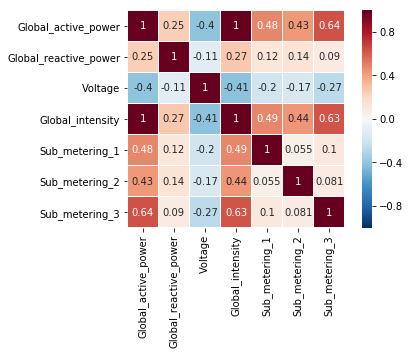

In [0]:
import seaborn as sb
sb.heatmap(norm_data.corr(), cmap="RdBu_r", vmin=-1, vmax=1, square=True, linewidths=.5, annot=True)
# la intensidad y la potencia activa son directamente proporcionales

In [0]:
new_data = norm_data.drop(columns="Global_intensity")

In [0]:
print(new_data.shape)

(2049280, 6)


In [0]:
print(norm_data.columns.to_numpy())

['Global_active_power' 'Global_reactive_power' 'Voltage'
 'Global_intensity' 'Sub_metering_1' 'Sub_metering_2' 'Sub_metering_3']


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


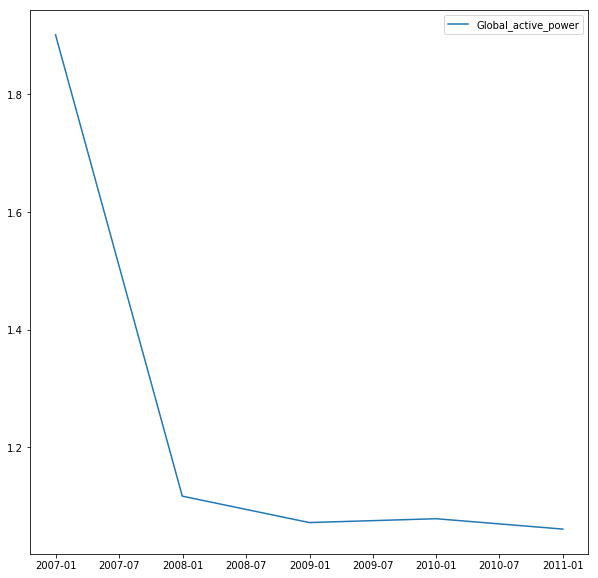

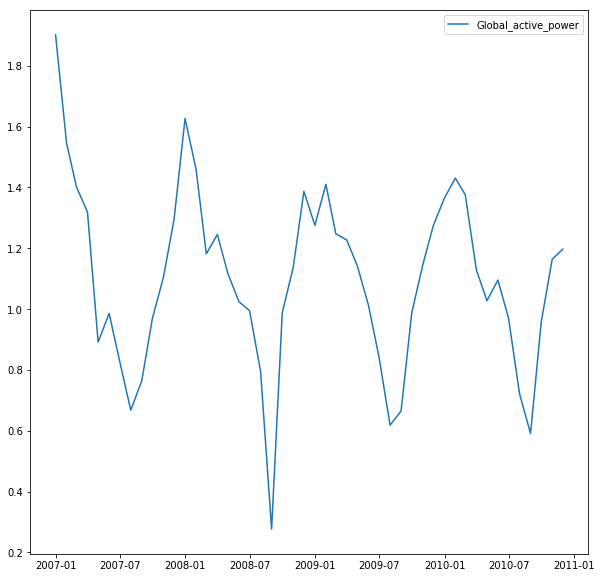

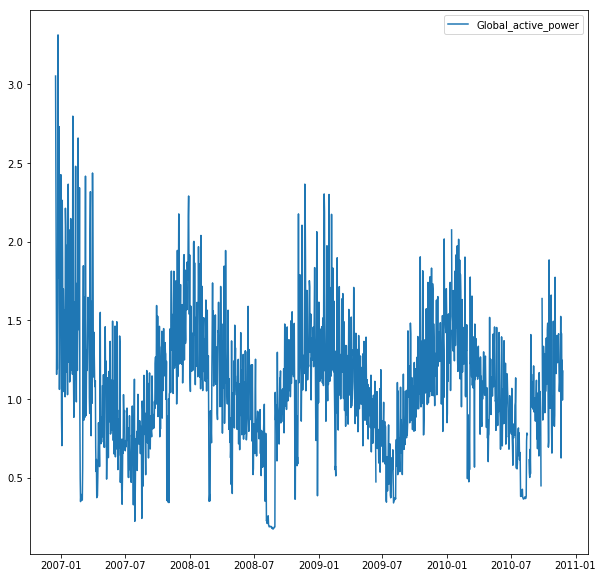

In [0]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,10))

yearly_data = dropped_data.resample('y').mean()["Global_active_power"]
monthly_data = dropped_data.resample('M').mean()["Global_active_power"]
daily_data = dropped_data.resample('D').mean()["Global_active_power"]

plt.plot(yearly_data)
plt.legend(["Global_active_power"])
plt.show()

plt.subplots(figsize=(10,10))

plt.plot(monthly_data)
plt.legend(["Global_active_power"])
plt.show()

plt.subplots(figsize=(10,10))

plt.plot(daily_data)
plt.legend(["Global_active_power"])
plt.show()

In [0]:
print(daily_data.values[:300])
dropped_daily_data = daily_data.dropna()
dropped_monthly_data = monthly_data.dropna()
dropped_yearly_data = yearly_data.dropna()
print(dropped_daily_data.values[:300])

[3.05347475 2.35448611 1.53043472 1.15707917 1.54565833 1.193758
 1.62592917 3.31485139 1.77084167 1.90494444 2.73202083 1.06163889
 1.43933194 2.20443889 1.93970932 2.426525   1.90903056 0.88141389
 0.70420417 2.26348056 1.88428056 1.04748472 1.69973611 1.5565
 1.29795417 1.49638889 1.56610694 1.01478889 2.21306528 2.09021265
 1.4921375  1.17111389 1.97756111 1.26490417 1.02808333 2.17620278
 2.36615417 1.51423194 1.23447222 2.07489861 1.10857222 1.12359167
 1.41949444 2.1474663  1.37685    1.18597083 1.64149444 1.26719444
 1.15815    2.79841806 2.49718056 1.14255556 0.88436111 1.61667917
 1.25098194 1.1251375  1.96481111 2.48001944 1.30389583 0.98232361
 1.73518889 1.3787125  1.18231111 1.4423     2.65955694 1.51848194
 2.18745    1.43949583 2.34316968 0.91213889 0.49647361 0.34843056
 0.39478056 0.3598     0.36164861 0.35941944 0.35811667 0.56883472
 1.451875   1.84745278 0.865625   1.64944861 1.09175833 0.88375833
 1.72549444 2.41710833 1.35463056 0.89593333 1.24539167 1.30889861
 

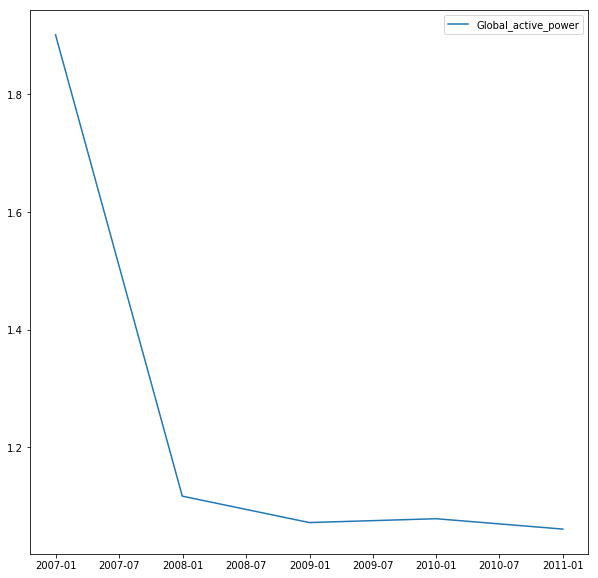

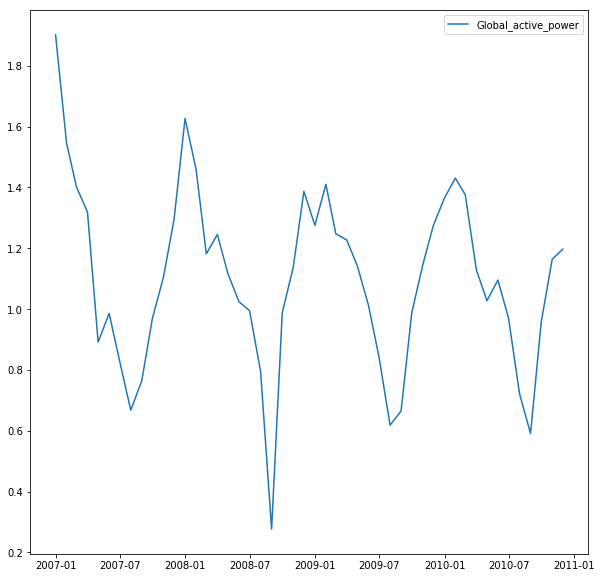

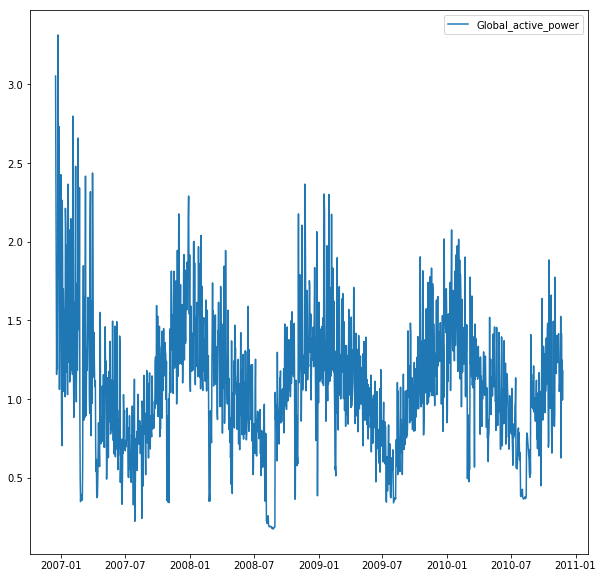

In [0]:
plt.subplots(figsize=(10,10))

plt.plot(dropped_yearly_data)
plt.legend(["Global_active_power"])
plt.show()

plt.subplots(figsize=(10,10))

plt.plot(dropped_monthly_data)
plt.legend(["Global_active_power"])
plt.show()

plt.subplots(figsize=(10,10))

plt.plot(dropped_daily_data)
plt.legend(["Global_active_power"])
plt.show()

In [0]:
raw_dataset = dropped_data.resample('d').sum()

dataset = (raw_dataset - raw_dataset.mean()) / raw_dataset.std()





In [0]:
data = dataset.values

X1 = data[:-1, 0]
Y1 = data[1:, 0]

X2 = data[:-1]
Y2 = data[1:, 0]

X3 = np.array([data[i:i+7, 0] for i in np.arange(data.shape[0]-7)])
Y3 = data[7:, 0]

X4 = np.array([data[i:i+7] for i in np.arange(data.shape[0]-9)])
# El sec2sec necesita meterle al decoder la Y justamente anterior a la que va a sacar.
AE4 = np.array([data[i:i+3, 0] for i in np.arange(6, data.shape[0]-3)]) 
Y4 = np.array([data[i:i+3, 0] for i in np.arange(7, data.shape[0]-2)])

X5 = np.array([data[i:i+7, 0] for i in np.arange(data.shape[0]-9)])
# El sec2sec necesita meterle al decoder la Y justamente anterior a la que va a sacar.
AE5 = np.array([data[i:i+3, 0] for i in np.arange(6, data.shape[0]-3)]) 
Y5 = np.array([data[i:i+3, 0] for i in np.arange(7, data.shape[0]-2)])

print(X1.shape, Y1.shape)
print(X2.shape, Y2.shape)
print(X3.shape, Y3.shape)
print(X4.shape, AE4.shape, Y4.shape)

(1441,) (1441,)
(1441, 7) (1441,)
(1435, 7) (1435,)
(1433, 7, 7) (1433, 3) (1433, 3)


In [0]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

callback = [EarlyStopping("val_loss", patience=5)]

In [0]:
# Modelo 1

x_train, x_test, y_train, y_test = train_test_split(X1.reshape(-1, 1, 1), Y1.reshape(-1, 1), test_size=0.25)

batch_size_1 = 16

model_1 = Sequential()

model_1.add(CuDNNLSTM(512, input_shape=(1, 1)))

model_1.add(Dense(256, activation="relu"))

model_1.add(Dropout(0.5))
model_1.add(BatchNormalization())
model_1.add(Dense(1))

model_1.compile(optimizer="adam", loss="mse")

hist_1 = model_1.fit(x_train, y_train, epochs=100, batch_size=batch_size_1, 
                 validation_data=(x_test, y_test), callbacks=callback)

model_1.save("model1-2.h5")


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1080 samples, validate on 361 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1080/1080 [==============================] - 6s 5ms/sample - loss: 0.7265 - val_loss: 1.0582
Epoch 2/100
1080/1080 [==============================] - 1s 611us/sample - loss: 0.6616 - val_loss: 1.0442
Epoch 3/100
1080/1080 [==============================] - 1s 628us/sample - loss: 0.6526 - val_loss: 1.0089
Epoch 4/100
1080/1080 [==============================] - 1s 618us/sample - loss: 0.6285 - val_loss: 1.0016
Epoch 5/100
1080/1080 [==============================] - 1s 599us/sample - loss: 0.6341 - val_loss: 0.9150
Epoch 6/100
1080/1080 [==============================] - 1s 621us/sample - loss: 0.6162 - val_loss: 0.8336
Epoch 7/100
1080/1080 [=======

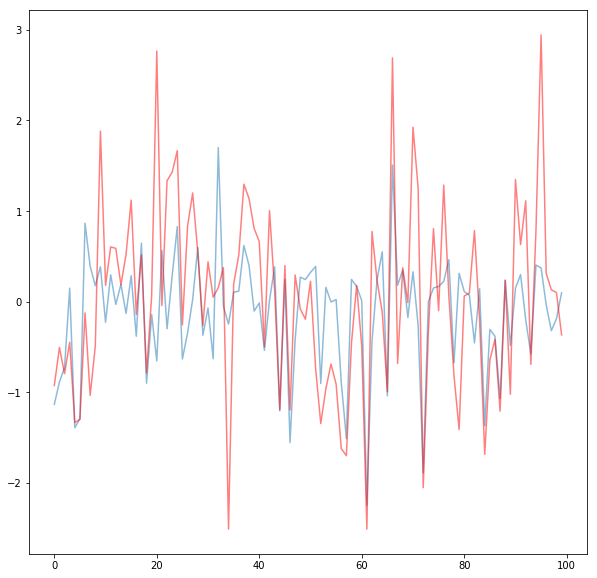

In [0]:
model = load_model("model1-2.h5")

yp = model.predict(x_test)

# print(yp.shape[0])

plt.subplots(figsize=(10, 10))

plt.plot(np.arange(100), yp[:100], alpha=0.50)
plt.plot(np.arange(100), y_test[:100], 'r', alpha=0.50)
plt.show()

In [0]:
# Modelo 2

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X2.reshape(-1, 1, 7), Y2.reshape(-1, 1), test_size=0.25)

batch_size_2 = 16

model_2 = Sequential()

model_2.add(CuDNNLSTM(512, input_shape=(1, 7)))

model_2.add(Dense(256, activation="relu"))

model_2.add(Dropout(0.5))
model_2.add(BatchNormalization())
model_2.add(Dense(1))

model_2.compile(optimizer="adam", loss="mse")

hist_2 = model_2.fit(x_train_2, y_train_2, epochs=100, batch_size=batch_size_2, 
                 validation_data=(x_test_2, y_test_2), callbacks=callback)

model_2.save("model2.h5")

Train on 1080 samples, validate on 361 samples
Epoch 1/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.0287 - val_loss: 0.9016
Epoch 2/100
1080/1080 [==============================] - 1s 599us/sample - loss: 0.9130 - val_loss: 0.8074
Epoch 3/100
1080/1080 [==============================] - 1s 600us/sample - loss: 0.7224 - val_loss: 0.8139
Epoch 4/100
1080/1080 [==============================] - 1s 612us/sample - loss: 0.6744 - val_loss: 0.7443
Epoch 5/100
1080/1080 [==============================] - 1s 587us/sample - loss: 0.6849 - val_loss: 0.7337
Epoch 6/100
1080/1080 [==============================] - 1s 594us/sample - loss: 0.6545 - val_loss: 0.6250
Epoch 7/100
1080/1080 [==============================] - 1s 600us/sample - loss: 0.6401 - val_loss: 0.6710
Epoch 8/100
1080/1080 [==============================] - 1s 613us/sample - loss: 0.6414 - val_loss: 0.5338
Epoch 9/100
1080/1080 [==============================] - 1s 613us/sample - loss: 0.5963 - val_loss:

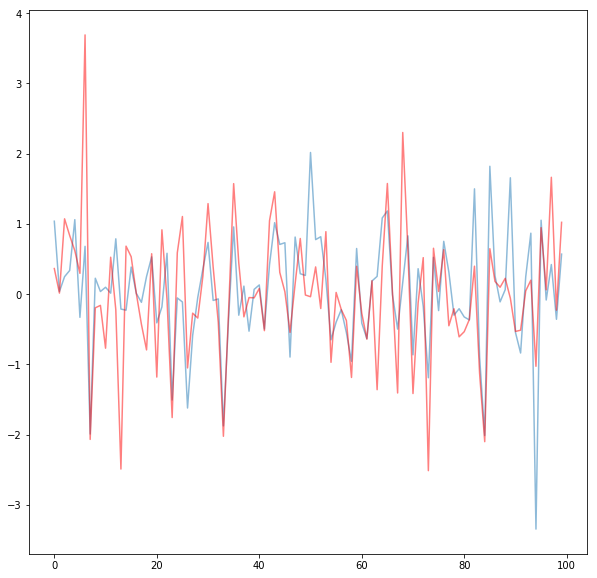

In [0]:
model = load_model("model2.h5")

yp_2 = model.predict(x_test_2)

# print(yp.shape[0])

plt.subplots(figsize=(10, 10))

plt.plot(np.arange(100), yp_2[:100], alpha=0.50)
plt.plot(np.arange(100), y_test_2[:100], 'r', alpha=0.50)
plt.show()

In [0]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(X3.reshape(-1, 7, 1), Y3.reshape(-1, 1), test_size=0.25, shuffle=False)

batch_size_3 = 16

model_3 = Sequential()

model_3.add(CuDNNLSTM(512, input_shape=(7, 1)))

model_3.add(Dense(256, activation="relu"))

model_3.add(Dropout(0.5))
model_3.add(BatchNormalization())
model_3.add(Dense(1))

model_3.compile(optimizer="adam", loss="mse")

hist_3 = model_3.fit(x_train_3, y_train_3, epochs=100, batch_size=batch_size_3, 
                 validation_data=(x_test_3, y_test_3), callbacks=callback)

model_3.save("model3.h5")

Train on 1076 samples, validate on 359 samples
Epoch 1/100
1076/1076 [==============================] - 2s 2ms/sample - loss: 1.1972 - val_loss: 0.9269
Epoch 2/100
1076/1076 [==============================] - 1s 789us/sample - loss: 0.8800 - val_loss: 0.9413
Epoch 3/100
1076/1076 [==============================] - 1s 797us/sample - loss: 0.6932 - val_loss: 0.8248
Epoch 4/100
1076/1076 [==============================] - 1s 805us/sample - loss: 0.6270 - val_loss: 0.7705
Epoch 5/100
1076/1076 [==============================] - 1s 812us/sample - loss: 0.6165 - val_loss: 0.7430
Epoch 6/100
1076/1076 [==============================] - 1s 815us/sample - loss: 0.6067 - val_loss: 0.6917
Epoch 7/100
1076/1076 [==============================] - 1s 802us/sample - loss: 0.6104 - val_loss: 0.6852
Epoch 8/100
1076/1076 [==============================] - 1s 805us/sample - loss: 0.5888 - val_loss: 0.6746
Epoch 9/100
1076/1076 [==============================] - 1s 794us/sample - loss: 0.5958 - val_loss:

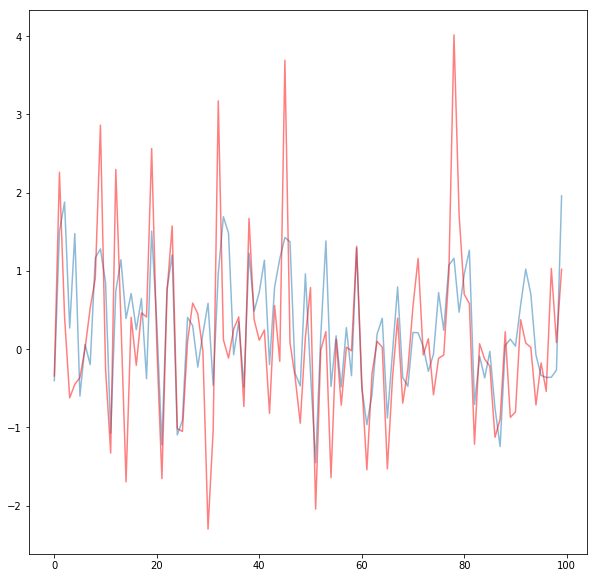

In [0]:
model = load_model("model3.h5")

yp_3 = model.predict(x_test_3)

# print(yp.shape[0])

plt.subplots(figsize=(10, 10))

plt.plot(np.arange(100), yp_3[:100], alpha=0.50)
plt.plot(np.arange(100), y_test_3[:100], 'r', alpha=0.50)
plt.show()

In [0]:
a = (3,)
print(a[1])

IndexError: ignored

In [0]:
encoder_input_all_data = X4.reshape(-1, 7, 7)
decoder_input_all_data = AE4.reshape(-1, 3, 1)
decoder_output_all_data = Y4.reshape(-1, 3, 1)

limit = int(X4.shape[0] *.75) 

encoder_input_data = encoder_input_all_data[:limit]
decoder_input_data = decoder_input_all_data[:limit]
decoder_output_data = decoder_output_all_data[:limit]

encoder_input_val = encoder_input_all_data[limit:]
decoder_input_val = decoder_input_all_data[limit:]
decoder_output_val = decoder_output_all_data[limit:]

print(decoder_output_val.shape)


batch_size_4 = 16

latent_dim = 4

input_shape = (7, 7)

output_shape = 3

# Define an input sequence and process it.
encoder_inputs = Input(shape=(input_shape[0], input_shape[1]))
encoder = CuDNNLSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(output_shape, 1))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = CuDNNLSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(1)
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model_4 = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Run training
model_4.compile(optimizer='rmsprop', loss='mse')

model_4.summary()

hist_4 = model_4.fit([encoder_input_data, decoder_input_data], decoder_output_data,
          batch_size=16,
          epochs=100,
          validation_data=([encoder_input_val, decoder_input_val], decoder_output_val), 
          callbacks=callback)


model_4.save("model4.h5")

(359, 3, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_65 (InputLayer)           (None, 7, 7)         0                                            
__________________________________________________________________________________________________
input_66 (InputLayer)           (None, 3, 1)         0                                            
__________________________________________________________________________________________________
cu_dnnlstm_47 (CuDNNLSTM)       [(None, 4), (None, 4 208         input_65[0][0]                   
__________________________________________________________________________________________________
cu_dnnlstm_48 (CuDNNLSTM)       [(None, 3, 4), (None 112         input_66[0][0]                   
                                                                 cu_dnnlstm_47[0][1]             

[[ 0.33216281]
 [ 1.28679225]
 [-0.11606543]]
[[0.44414684]
 [0.48262897]
 [0.70192206]]


AttributeError: ignored

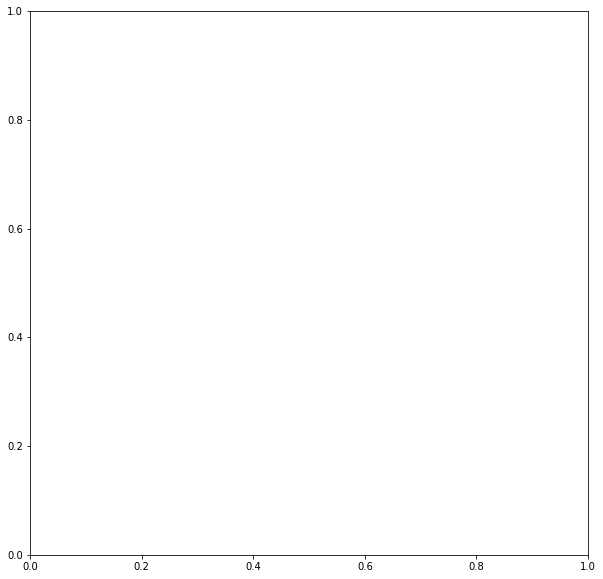

In [0]:
model = load_model("model4.h5")

yp_4 = model.predict([encoder_input_val, decoder_input_val])

plt.subplots(figsize=(10, 10))

print(decoder_output_val[0])
print(yp_4[0])

plt.plot(np.arange(3), yp_4[0].T, alpha=0.50)
plt.plot(np.arange(3), decoder_output_val[0].T, 'r', alpha=0.50)
plt.show()

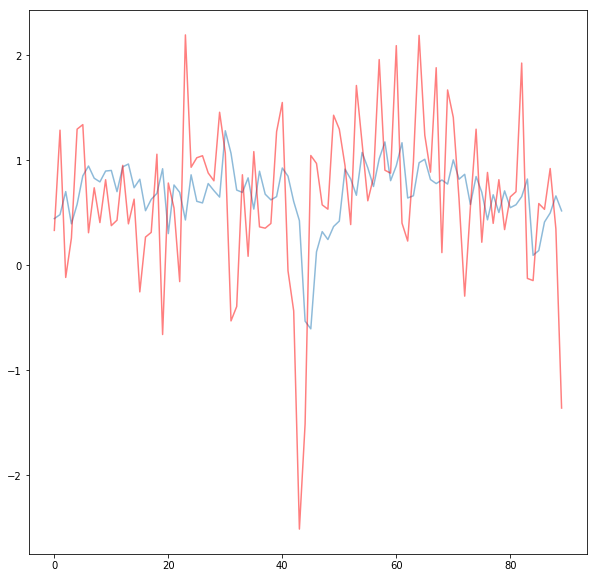

In [0]:
indexes = [i*3 for i in np.arange(30)]

# print(yp_4[indexes].shape)

real_yp = yp_4[indexes].reshape(90)

# print(real_yp.shape)

# print(yp_4[indexes], yp_4[indexes].reshape(90))

plt.subplots(figsize=(10, 10))

plt.plot(np.arange(90), real_yp, alpha=0.50)
plt.plot(np.arange(90), decoder_output_val[indexes].reshape(90), 'r', alpha=0.50)
plt.show()

In [0]:
encoder_input_all_data_extra = X5.reshape(-1, 7, 1)
decoder_input_all_data_extra = AE5.reshape(-1, 3, 1)
decoder_output_all_data_extra = Y5.reshape(-1, 3, 1)

limit = int(X5.shape[0] *.75) 

encoder_input_data_extra = encoder_input_all_data_extra[:limit]
decoder_input_data_extra = decoder_input_all_data_extra[:limit]
decoder_output_data_extra = decoder_output_all_data_extra[:limit]

encoder_input_val_extra = encoder_input_all_data_extra[limit:]
decoder_input_val_extra = decoder_input_all_data_extra[limit:]
decoder_output_val_extra = decoder_output_all_data_extra[limit:]


batch_size_4 = 16

latent_dim = 4

input_shape_extra = (7, 1)

output_shape = 3

# Define an input sequence and process it.
encoder_inputs_extra = Input(shape=(input_shape_extra[0], input_shape_extra[1]))
encoder_extra = CuDNNLSTM(latent_dim, return_state=True)
encoder_outputs_extra, state_h_extra, state_c_extra = encoder_extra(encoder_inputs_extra)
# We discard `encoder_outputs` and only keep the states.
encoder_states_extra = [state_h_extra, state_c_extra]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs_extra = Input(shape=(output_shape, 1))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm_extra = CuDNNLSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs_extra, _, _ = decoder_lstm(decoder_inputs_extra,
                                     initial_state=encoder_states_extra)
decoder_dense_extra = Dense(output_shape)
decoder_outputs_extra = decoder_dense(decoder_outputs_extra)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model_5 = Model([encoder_inputs_extra, decoder_inputs_extra], decoder_outputs_extra)

# Run training
model_5.compile(optimizer='rmsprop', loss='mse')
hist_5 = model_5.fit([encoder_input_data_extra, decoder_input_data_extra], decoder_output_data_extra,
          batch_size=16,
          epochs=100,
          validation_data=([encoder_input_val_extra, decoder_input_val_extra], decoder_output_val_extra), 
          callbacks=callback)

model_5.save("model5.h5")

Train on 1074 samples, validate on 359 samples
Epoch 1/100
1074/1074 [==============================] - 5s 4ms/sample - loss: 0.7236 - val_loss: 0.4671
Epoch 2/100
1074/1074 [==============================] - 1s 576us/sample - loss: 0.5967 - val_loss: 0.4633
Epoch 3/100
1074/1074 [==============================] - 1s 572us/sample - loss: 0.5818 - val_loss: 0.4603
Epoch 4/100
1074/1074 [==============================] - 1s 589us/sample - loss: 0.5736 - val_loss: 0.4488
Epoch 5/100
1074/1074 [==============================] - 1s 572us/sample - loss: 0.5684 - val_loss: 0.4456
Epoch 6/100
1074/1074 [==============================] - 1s 565us/sample - loss: 0.5642 - val_loss: 0.4462
Epoch 7/100
1074/1074 [==============================] - 1s 572us/sample - loss: 0.5608 - val_loss: 0.4434
Epoch 8/100
1074/1074 [==============================] - 1s 543us/sample - loss: 0.5583 - val_loss: 0.4402
Epoch 9/100
1074/1074 [==============================] - 1s 579us/sample - loss: 0.5559 - val_loss:

In [0]:
model = load_model("model5.h5")

yp_5 = model.predict([encoder_input_val_extra, decoder_input_val_extra])

plt.subplots(figsize=(10, 10))

plt.plot(np.arange(100), yp_3[:300:3], alpha=0.50)
plt.plot(np.arange(100), y_test_3[:300:3], 'r', alpha=0.50)
plt.show()

plt.subplots(figsize=(10, 10))

plt.plot(np.arange(100), yp_3[1:301:3], alpha=0.50)
plt.plot(np.arange(100), y_test_3[1:301:3], 'r', alpha=0.50)
plt.show()

plt.subplots(figsize=(10, 10))

plt.plot(np.arange(100), yp_3[2:302:3], alpha=0.50)
plt.plot(np.arange(100), y_test_3[2:302:3], 'r', alpha=0.50)
plt.show()